In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [3]:
# Load the dataset
url = "Avocado_HassAvocadoBoard_20152023v1.0.1.csv"
avocado_data = pd.read_csv(url)

In [4]:
# Display the first 10 rows of the dataset
avocado_data.head(100)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,Spokane
96,2015-01-04,1.15,198735.26,125713.89,34555.73,53.54,38412.10,38400.99,11.11,0.0,conventional,StLouis
97,2015-01-04,1.80,3597.07,1552.48,1521.26,0.00,523.33,523.33,0.00,0.0,organic,StLouis
98,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.0,conventional,Syracuse


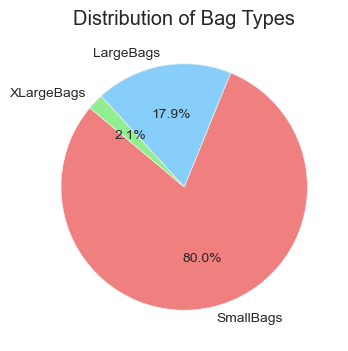

In [5]:
# Assuming avocado_data is your DataFrame
bag_types = ['SmallBags', 'LargeBags', 'XLargeBags']
total_bags = {bag: avocado_data[bag].sum() for bag in bag_types}

# Create data for the pie plot
sizes = list(total_bags.values())
labels = list(total_bags.keys())
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bag Types')
plt.show()

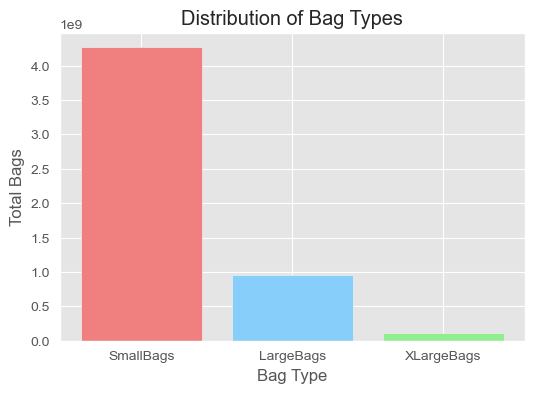

In [6]:
# Assuming avocado_data is your DataFrame
bag_types = ['SmallBags', 'LargeBags', 'XLargeBags']
total_bags = {bag: avocado_data[bag].sum() for bag in bag_types}

# Create data for the bar plot
labels = list(total_bags.keys())
sizes = list(total_bags.values())
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Bag Type')
plt.ylabel('Total Bags')
plt.title('Distribution of Bag Types')
plt.show()

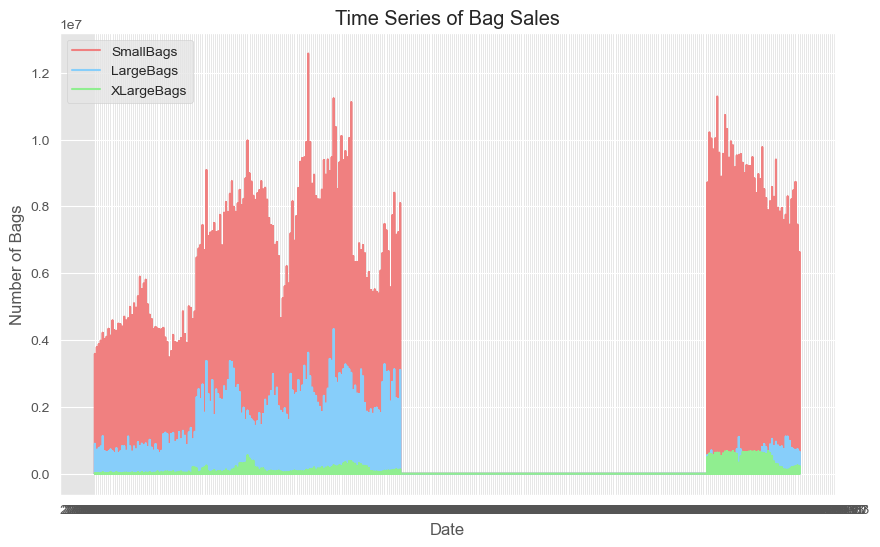

In [9]:
plt.figure(figsize=(10, 6))
for bag, color in zip(bag_types, colors):
    plt.plot(avocado_data['Date'], avocado_data[bag], label=bag, color=color)
plt.xlabel('Date')
plt.ylabel('Number of Bags')
plt.title('Time Series of Bag Sales')
plt.legend()
plt.show()

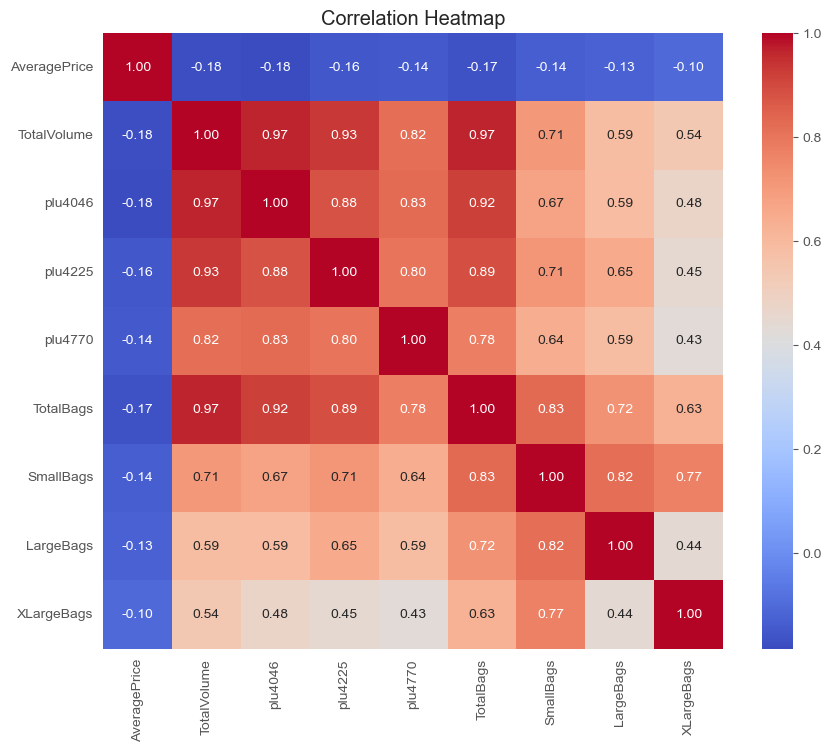

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = avocado_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

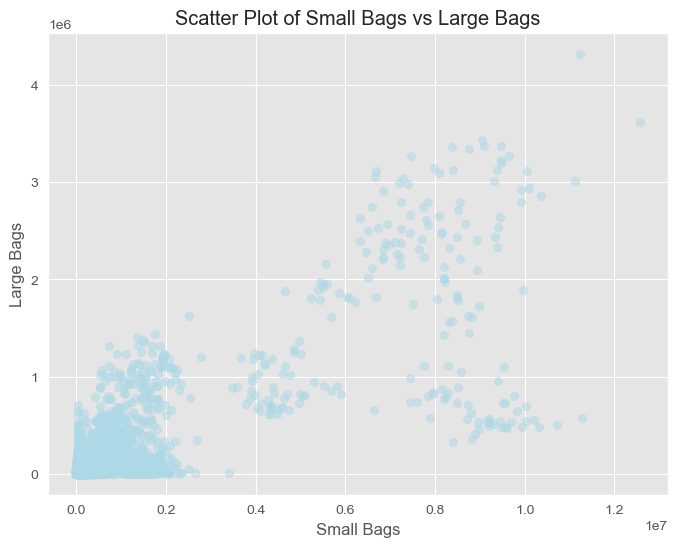

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(avocado_data['SmallBags'], avocado_data['LargeBags'], alpha=0.5, color='lightblue')
plt.xlabel('Small Bags')
plt.ylabel('Large Bags')
plt.title('Scatter Plot of Small Bags vs Large Bags')
plt.show()

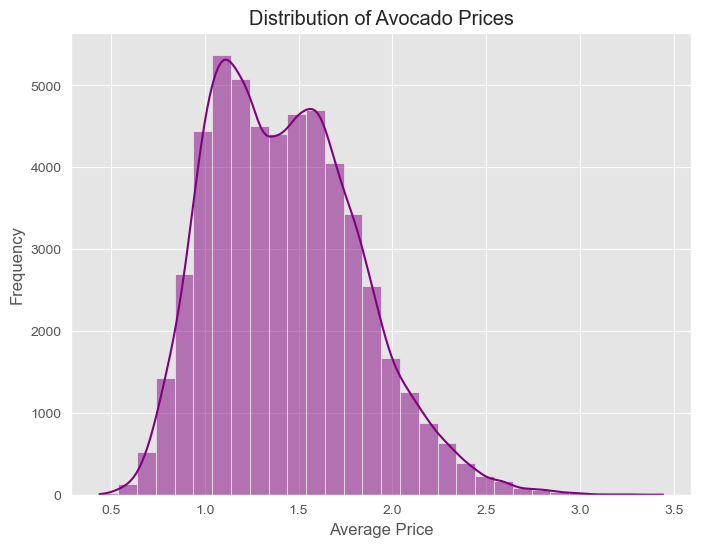

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(avocado_data['AveragePrice'], bins=30, kde=True, color='purple')
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

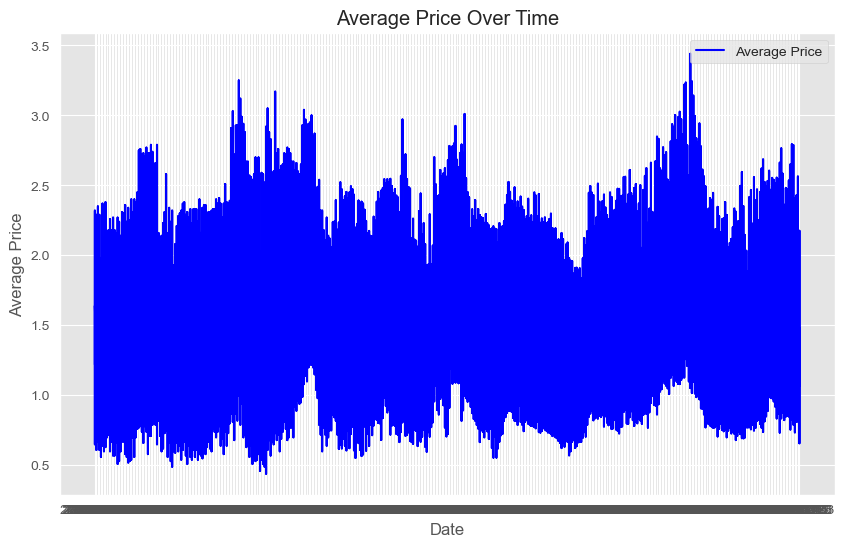

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(avocado_data['Date'], avocado_data['AveragePrice'], label='Average Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.legend()
plt.show()

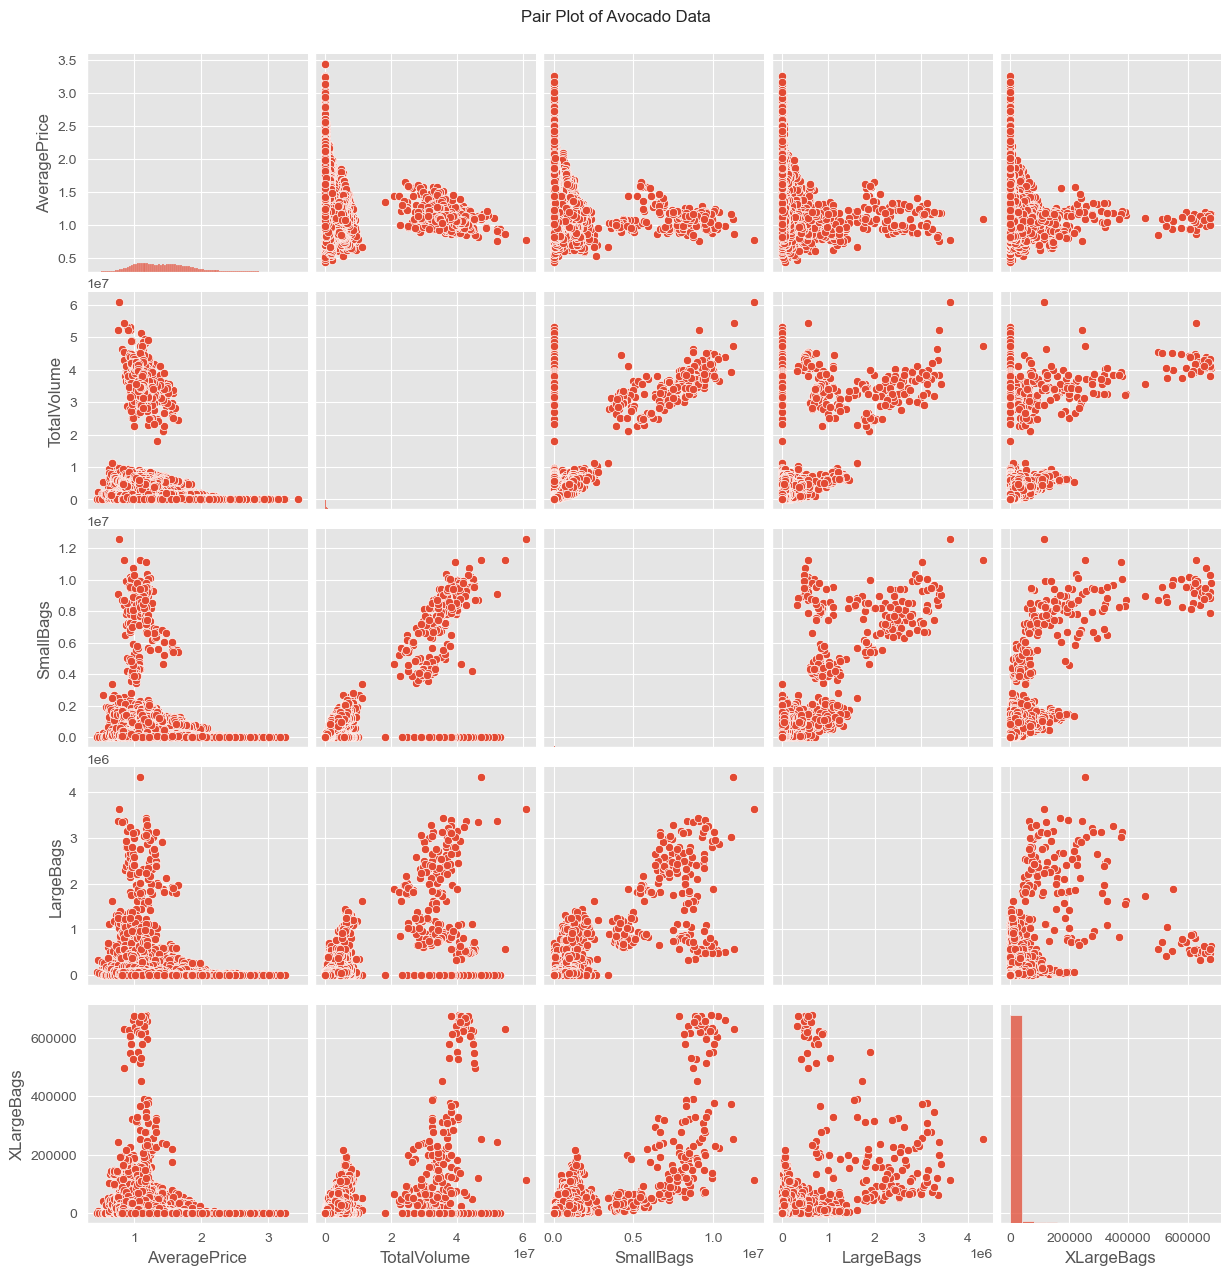

In [16]:
import seaborn as sns

sns.pairplot(avocado_data[['AveragePrice', 'TotalVolume', 'SmallBags', 'LargeBags', 'XLargeBags']])
plt.suptitle('Pair Plot of Avocado Data', y=1.02)
plt.show()

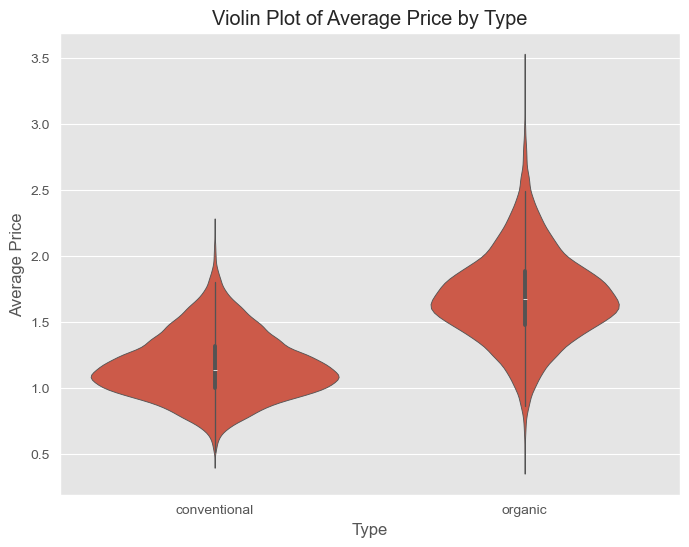

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='AveragePrice', data=avocado_data)
plt.title('Violin Plot of Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

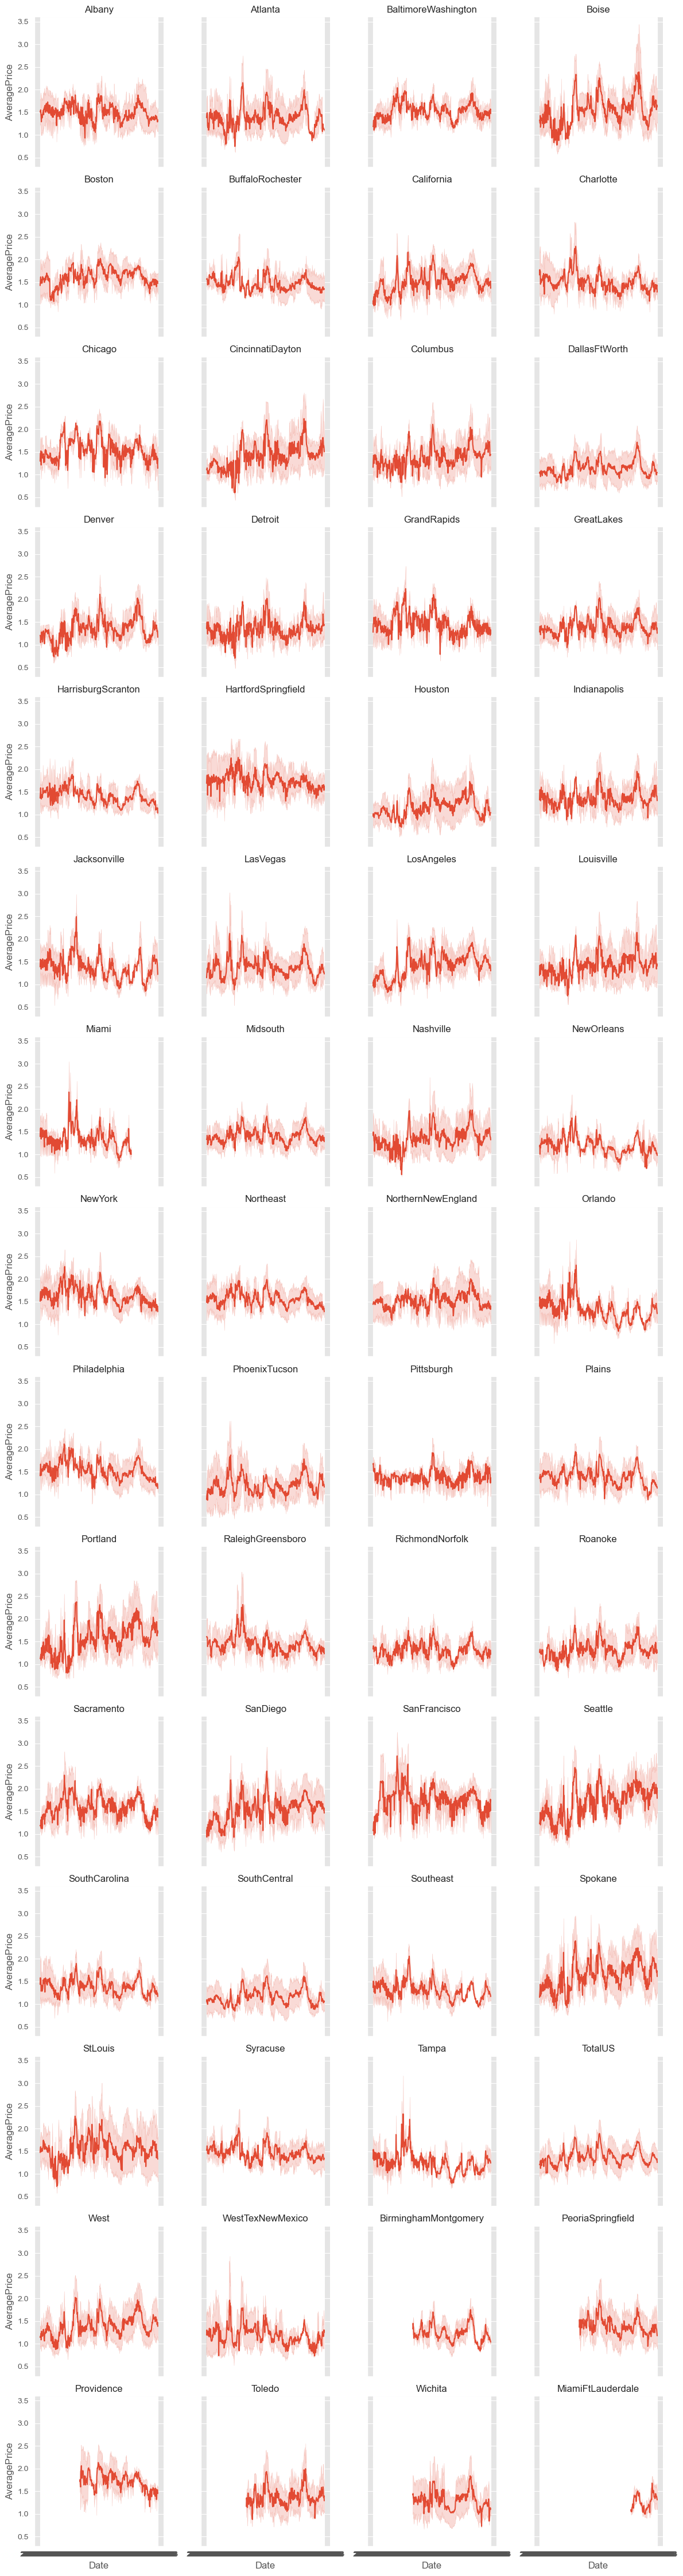

In [20]:
g = sns.FacetGrid(avocado_data, col='region', col_wrap=4, height=3)
g.map(sns.lineplot, 'Date', 'AveragePrice')
g.set_titles('{col_name}')
plt.show()